Importing Intial Libs

In [50]:
#Initail Imports
import math 
import numpy
from matplotlib import pyplot 
%matplotlib inline 

Intializing grid

In [51]:
#setting up grid
N = 51
x_start, x_end, y_start, y_end = -1.0 , 2.0 , -0.5 , 0.5
x , y = numpy.linspace(x_start , x_end, N) , numpy.linspace(y_start, y_end, N)
X,Y = numpy.meshgrid(x,y)

Ploting grid to ensure it is correct

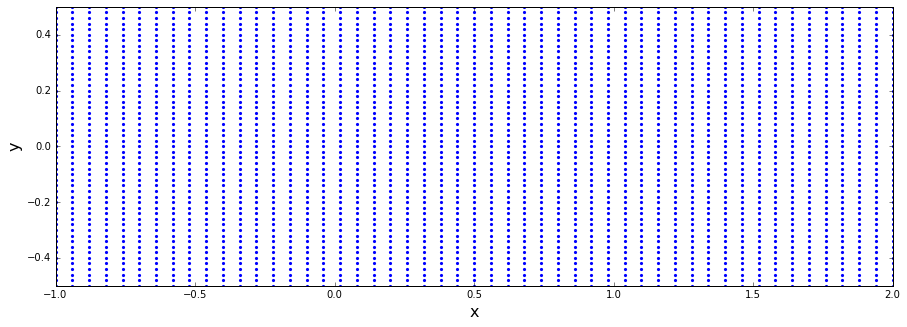

In [52]:
#checking to see if grid is correct
size = 15
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.scatter(X, Y, s=10, marker='o', linewidth=0)

Importing the sources/sinks

In [53]:
#importing NACAfiles
sigma = numpy.loadtxt('NACA0012_sigma.txt')
x_sources_sinks = numpy.loadtxt('NACA0012_x.txt')
y_sources_sinks = numpy.loadtxt('NACA0012_y.txt')

Setting up freestream

In [54]:
#setting up freesteam 
u_inf = 1.0 
u_freestream = u_inf*numpy.ones((N,N), dtype = float)
v_freestream = numpy.zeros((N,N), dtype = float)
psi_freestream = u_inf * Y

Velocity function

In [58]:
#create velocity function

def get_velocity(sigma,x,y,X,Y):
    
    u = sigma/(2*numpy.pi)*(X-x)/((X-x)**2+(Y-y)**2)
    v = sigma/(2*numpy.pi)*(Y-y)/((X-x)**2+(Y-y)**2)
    
    return u , v

Compute stream function

In [59]:
def get_stream_function(sigma,x,y,X,Y):

    psi = sigma/(2*numpy.pi)*numpy.arctan2((Y-y),(X-x))
    
    return psi

loop through and add resultant psi,vel for each source/sink

In [68]:
u,v = u_freestream,v_freestream
psi = numpy.zeros((N,N), dtype = float)

for i in range(len(sigma)):

    u_temp,v_temp = get_velocity(sigma[i],x_sources_sinks[i],y_sources_sinks[i],X,Y)
    
    psi_temp = get_stream_function(sigma[i],x_sources_sinks[i],y_sources_sinks[i],X,Y)
    
    
    u = u_temp + u
    v = v_temp + v
    
    psi = psi_temp + psi
    


ploting the streamline to see if it is as expected

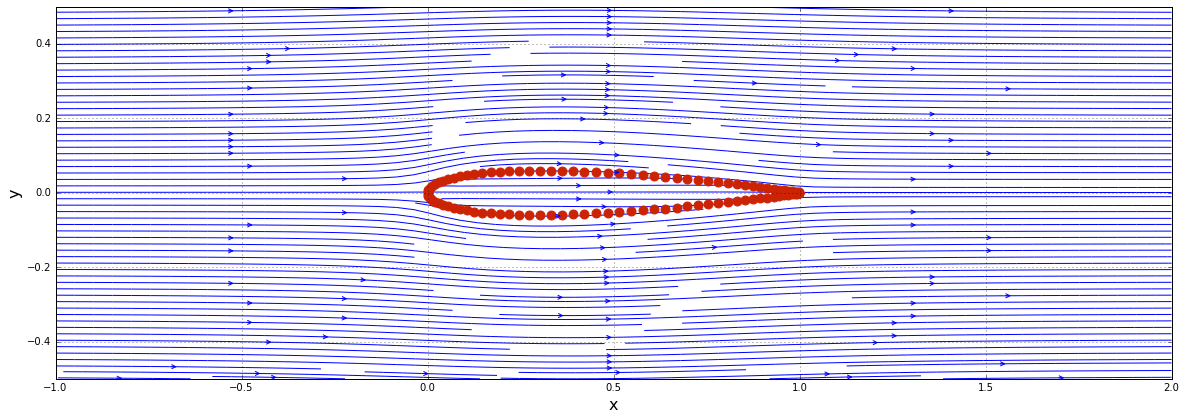

In [79]:
size = 20
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_sources_sinks, y_sources_sinks, color='#CD2305', s=80, marker='o')

Calculate and plot the pressure coefficient field

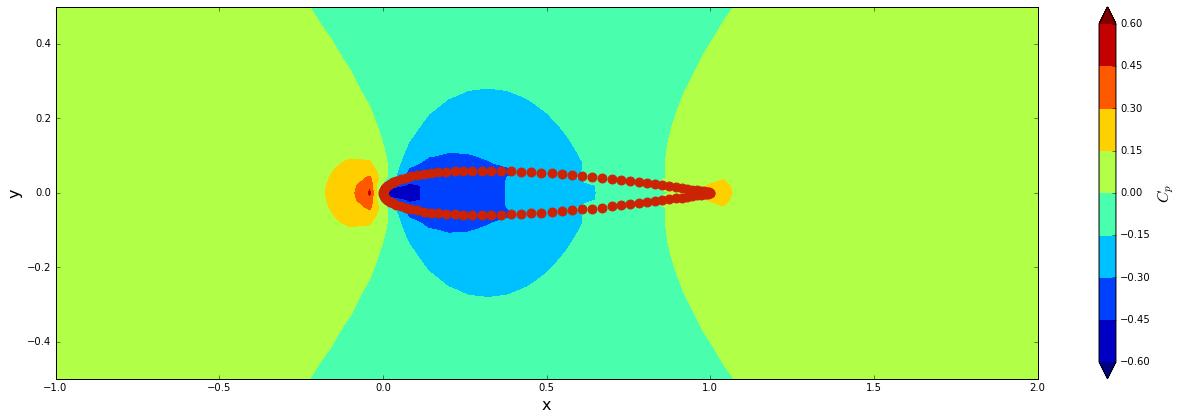

In [81]:
cp = 1.0 - (u**2+v**2)/u_inf**2

size = 20
pyplot.figure(figsize=(1.1*size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp, extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
pyplot.scatter([x_sources_sinks], [y_sources_sinks], color='#CD2305', s=80, marker='o')



Finding max value of cp

In [74]:
numpy.max(cp)

0.47144366133162352

In [75]:
numpy.min(cp)

-0.55237082967192541

In [83]:
numpy.where(cp == numpy.max(cp))

(array([25]), array([16]))